# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

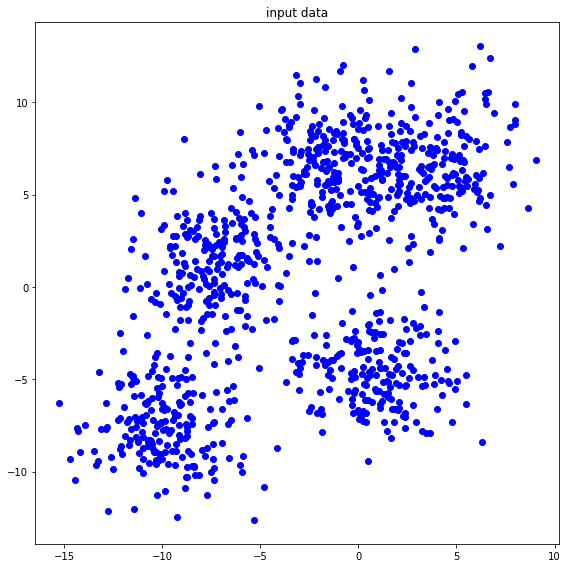

In [186]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [187]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # feature : n: 데이터의 수 m: 피처의 수(여기선 2가 됨.)
    # center 는 x좌표에 대한 centroid, y좌표에 대한 centroid
    distance = (feature - np.tile(center,(len(feature),1)))**2 #브로드캐스팅..이 안되네..?
    distance = np.sqrt(distance[:,0]+distance[:,1])


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [188]:
def compute_centroid(feature, label_feature, label, prev_centroid):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # n개의 포인트에 대한 레이블. value_label = label 하나의 레이블, 
    # 해당 label 을 갖는 feature point 들의 x 평균값, y 평균값 구해서 (x,y) 로 만들어내기
    # centroid 가 결정되지 못할 때 이전의 centroid 값을 그대로 가져온다.
    centroid = prev_centroid
    cluster_feature = feature[np.where(label_feature == label)]

    if len(cluster_feature) != 0: 
        centroid = cluster_feature.sum(axis=0) / len(np.where(label_feature == label))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [189]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # 각각의 피처 거리 구해지면 각각의 클러스터에 대한 distance 주어지면, 
    label_feature = np.argmin(distance, axis=1)


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## compute loss

In [217]:
def compute_loss(feature, label_feature, centroid, number_cluster):
    
    # (point z - centroid of cluster)을 제곱한 값들의 합.을 모든 number_cluster 에 대해서 또 합. 나누기 n
   
    n = np.size(feature, 0)
    loss = 0
    for i in range(number_cluster):
        feature_cluster_index = np.where(label_feature == i)
        loss += np.sum(compute_distance(feature[feature_cluster_index], centroid[i]))
    return loss/n


## the number of clusters $K = 2$

In [218]:
number_cluster          = 2
number_iteration        = 30     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [219]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
# 최종적으로 Label_feature_02 에 최종 클러스터링 레이블이 저장되면 된다.
# centroid 가 결정되지 못하는 경우가 있다. 그 이전의 클러스터 레이블을 유지하도록 하면 된다.
# centroid 에 해당하는 feature point 가 하나도 없다면 이전 포인트를 유지해준다.

# optimize 할 때 현재의 

centroid = np.zeros((number_cluster, number_feature))
distance = np.zeros((number_data, number_cluster))

for i in range(number_iteration):
    for j in range(number_cluster):
        centroid[j] = compute_centroid(feature, label_feature_02, j, centroid[j])
        distance[:, j] = compute_distance(feature, centroid[j])
    label_feature_02 = compute_label(distance)
    loss_02 = compute_loss(feature, label_feature_02, centroid, number_cluster)
    centroid_iteration_02[i] = centroid
    loss_iteration_02[i] = loss_02
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [220]:
number_cluster          = 4
number_iteration        = 30     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [221]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
# 


centroid = np.zeros((number_cluster, number_feature))
distance = np.zeros((number_data, number_cluster))

for i in range(number_iteration):
    for j in range(number_cluster):
        centroid[j] = compute_centroid(feature, label_feature_04, j, centroid[j])
        distance[:, j] = compute_distance(feature, centroid[j])
    label_feature_04 = compute_label(distance)
    loss_04 = compute_loss(feature, label_feature_04, centroid, number_cluster)
    centroid_iteration_04[i] = centroid
    loss_iteration_04[i] = loss_04

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [222]:
number_cluster          = 8
number_iteration        = 30     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [223]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#


centroid = np.zeros((number_cluster, number_feature))
distance = np.zeros((number_data, number_cluster))


for i in range(number_iteration):
    for j in range(number_cluster):
        centroid[j] = compute_centroid(feature, label_feature_08, j, centroid[j])
        distance[:, j] = compute_distance(feature, centroid[j])
    label_feature_08 = compute_label(distance)
    loss_08 = compute_loss(feature, label_feature_08, centroid, number_cluster)
    centroid_iteration_08[i] = centroid
    loss_iteration_08[i] = loss_08


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [224]:
number_cluster          = 16
number_iteration        = 30    # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [225]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

centroid = np.zeros((number_cluster, number_feature))
distance = np.zeros((number_data, number_cluster))

for i in range(number_iteration):
    for j in range(number_cluster):
        centroid[j] = compute_centroid(feature, label_feature_16, j, centroid[j])
        distance[:, j] = compute_distance(feature, centroid[j])
    label_feature_16 = compute_label(distance)
    loss_16 = compute_loss(feature, label_feature_16, centroid, number_cluster)
    centroid_iteration_16[i] = centroid
    loss_iteration_16[i] = loss_16


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [227]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [228]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [229]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [230]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [231]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [232]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [233]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [234]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [235]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    color = ['green','yellow']


    for i in range(len(centroid_iteration_02)):
        x = centroid_iteration_02[:,i][:,0]
        y = centroid_iteration_02[:,i][:,1]
        plt.plot(x, y, color = color[i], label = 'cluster=%d' %i)
    
    x = centroid_iteration_02[0][:,0]
    y = centroid_iteration_02[0][:,1]
    plt.scatter(x, y, color = 'blue', marker = 's', label = 'initial')
   
    x = centroid_iteration_02[len(centroid_iteration_02)-1][:,0]
    y = centroid_iteration_02[len(centroid_iteration_02)-1][:,1]
    plt.scatter(x, y, color = 'red', marker = 's', label = 'final')
    

    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [236]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    color = ['green','yellow', 'purple','lightpink']


    for i in range(len(centroid_iteration_04)):
        x = centroid_iteration_04[:,i][:,0]
        y = centroid_iteration_04[:,i][:,1]
        plt.plot(x, y, color = color[i], label = 'cluster=%d' %i)
    
    x = centroid_iteration_04[0][:,0]
    y = centroid_iteration_04[0][:,1]
    plt.scatter(x, y, color = 'blue', label = 'initial')
    
    x = centroid_iteration_04[len(centroid_iteration_04)-1][:,0]
    y = centroid_iteration_04[len(centroid_iteration_04)-1][:,1]
    plt.scatter(x, y, color = 'red', marker = 's', label = 'final')


    plt.legend()
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [237]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    color = ['green','yellow', 'purple','lightpink','grey','olive', 'sienna','skyblue']


    for i in range(len(centroid_iteration_08)):
        x = centroid_iteration_08[:,i][:,0]
        y = centroid_iteration_08[:,i][:,1]
        plt.plot(x, y, color = color[i], label = 'cluster=%d' %i)
    
    x = centroid_iteration_08[0][:,0]
    y = centroid_iteration_08[0][:,1]
    plt.scatter(x, y, color = 'blue', label = 'initial')    
    
    x = centroid_iteration_08[len(centroid_iteration_08)-1][:,0]
    y = centroid_iteration_08[len(centroid_iteration_08)-1][:,1]
    plt.scatter(x, y, color = 'red', marker = 's', label = 'final')

    plt.legend()
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [238]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    color = ['green','yellow', 'purple','lightpink','grey','olive', 'sienna','skyblue', 'black','navy','plum','seagreen','lightseagreen','tan','bisque','gold']
   
    for i in range(len(centroid_iteration_16)):
        x = centroid_iteration_16[:,i][:,0]
        y = centroid_iteration_16[:,i][:,1]
        plt.plot(x, y, color = color[i], label = 'cluster=%d' %i)
    
    x = centroid_iteration_16[0][:,0]
    y = centroid_iteration_16[0][:,1]
    plt.scatter(x, y, color = 'blue', label = 'initial')
   
    x = centroid_iteration_16[len(centroid_iteration_16)-1][:,0]
    y = centroid_iteration_16[len(centroid_iteration_16)-1][:,1]
    plt.scatter(x, y, color = 'red', marker = 's', label = 'final')

    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [239]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [240]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [241]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [242]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) = 2881.3657045298
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) = 2881.3657045298
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) = 2881.3657045298
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) = 2881.3657045298
**************************************************
## [RESULT 05]
**************************************************


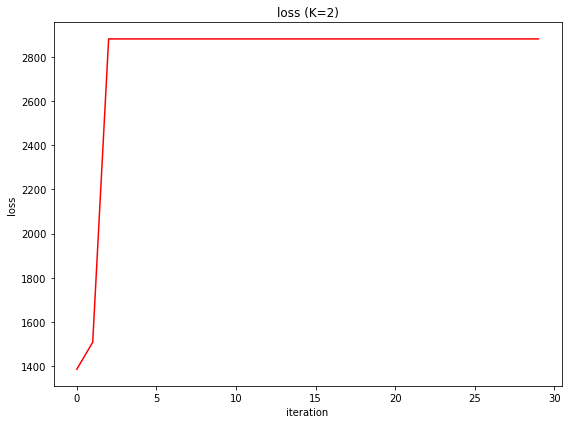

**************************************************
## [RESULT 06]
**************************************************


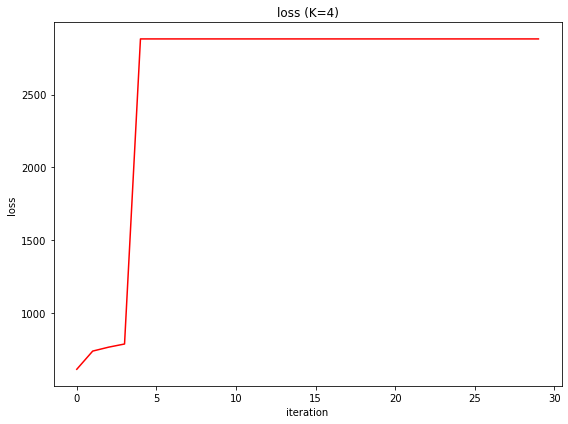

**************************************************
## [RESULT 07]
**************************************************


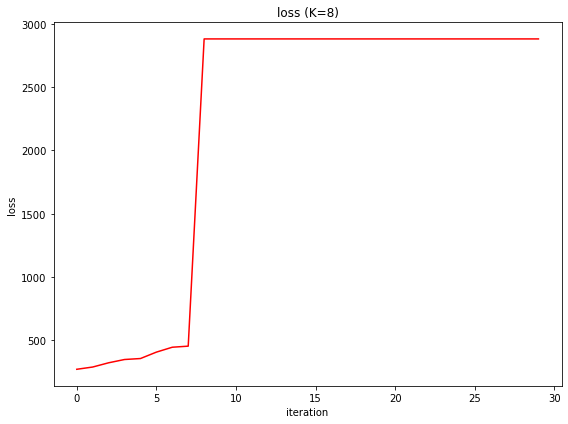

**************************************************
## [RESULT 08]
**************************************************


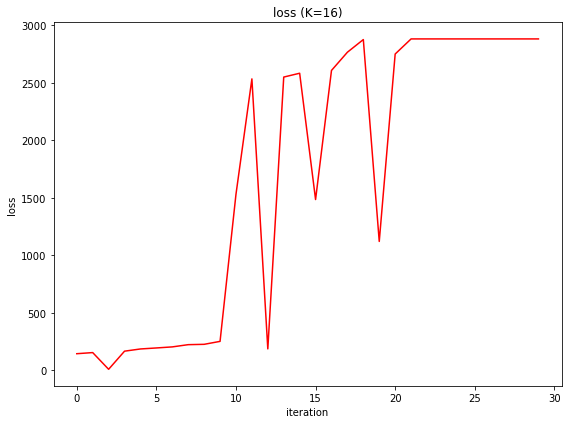

**************************************************
## [RESULT 09]
**************************************************


IndexError: index 2 is out of bounds for axis 1 with size 2

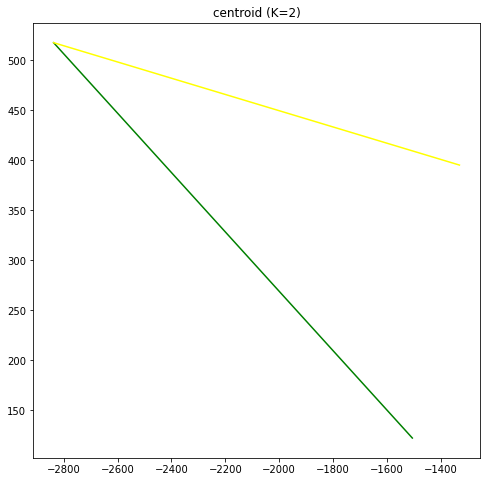

In [243]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)